### Importing libraries

In [1]:
import pandas as pd  # Import Pandas library for data manipulation
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for feature scaling
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
from sklearn.metrics import mean_squared_error, r2_score  # Import metrics for model evaluation
from ActivationLayer import ActivationLayer  # Import custom ActivationLayer
from FCLayer import FCLayer  # Import custom Fully Connected Layer
from FlattenLayer import FlattenLayer  # Import custom Flatten Layer

### Activation functions

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

### Derivative functions


In [3]:
def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu_prime(x):
    return np.array(x >= 0).astype('int')


### Loss functions


In [4]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))


### Derivatives of loss functions


In [5]:
def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

def sse_prime(y_true, y_pred):
    return y_pred - y_true

### Load the dataset using pandas

In [6]:
file_path = 'AMZN_1Yr.csv'
data = pd.read_csv(file_path)  # Reading the CSV file into a Pandas DataFrame

### Dataset has columns like 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'

In [7]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features]  # Selecting features from the DataFrame
y = data['Open']  # Selecting the target variable

### Visualizing the Dataset

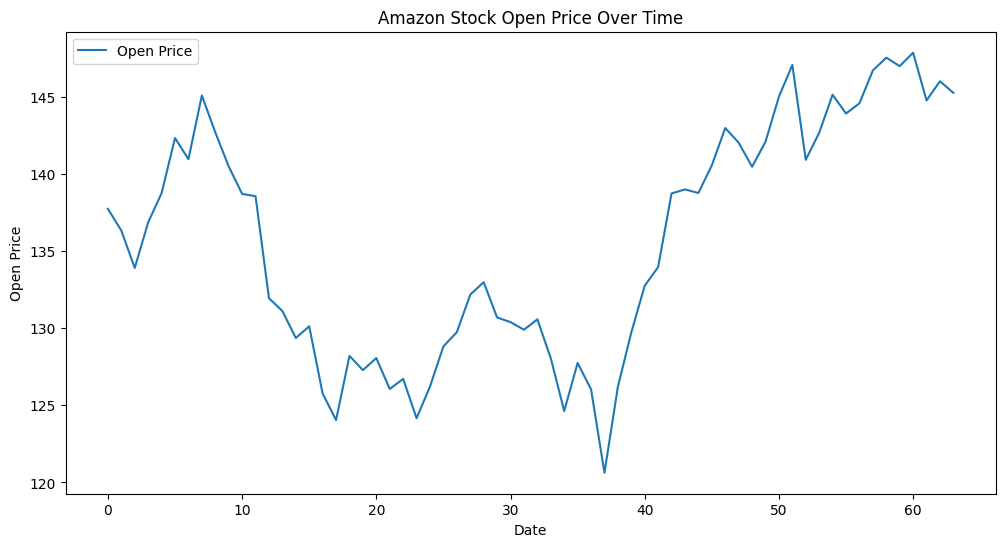

In [8]:

plt.figure(figsize=(12, 6))
plt.plot(data['Open'], label='Open Price')
plt.title('Amazon Stock Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

### Normalize the features


In [9]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Split the dataset into training and testing sets

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


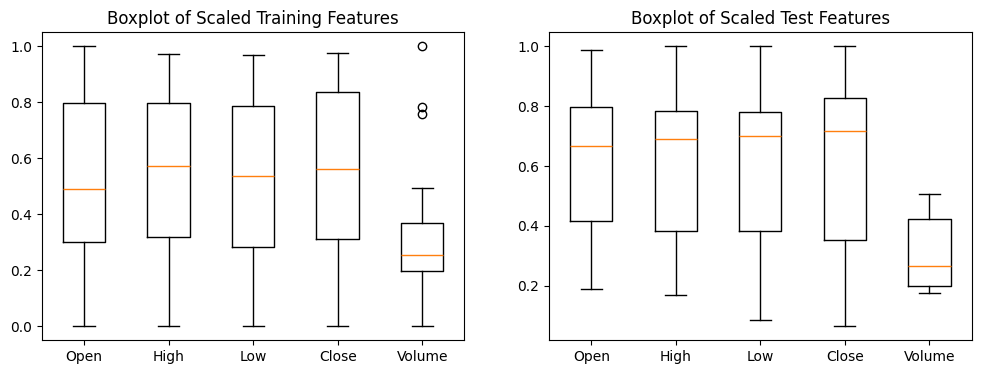

In [11]:
# Visualizing the Scaled Features
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].boxplot(x_train, labels=features)
axs[0].set_title('Boxplot of Scaled Training Features')
axs[1].boxplot(x_test, labels=features)
axs[1].set_title('Boxplot of Scaled Test Features')
plt.show()

### Define the number of features based on your dataset


In [12]:
num_features = x_train.shape[1]

### Define network architecture


In [13]:
network = [
    FlattenLayer(input_shape=(num_features,)),  # Flattening the input features
    FCLayer(num_features, 128),  # Fully connected layer with 128 neurons
    ActivationLayer(relu, relu_prime),  # Applying ReLU activation function
    FCLayer(128, 1),  # Fully connected layer with 1 neuron for regression
]

### Training loop


In [14]:
# Number of training epochs, representing how many times the entire dataset is passed forward and backward through the neural network
epochs = 40
# The step size for updating the neural network's weights during training
learning_rate = 0.0001 

# Loop through each training epoch
for epoch in range(epochs):  
    # Initialize the total loss for this epoch
    total_loss = 0  

    # Iterate over each training example and corresponding target value
    for x, y_true in zip(x_train, y_train):  
        # Set the initial output to the input features
        output = x  

        # Loop through each layer in the neural network
        for layer in network:  
            # Forward pass: compute the output of the layer
            output = layer.forward(output)  

        # Calculate the Mean Squared Error (MSE) between the predicted and true values
        loss = mse(y_true, output)
        # Accumulate the loss for this training example
        total_loss += loss

        # Compute the derivative of the loss with respect to the output
        output_error = mse_prime(y_true, output)

        # Backward pass: loop through each layer in reverse order
        for layer in reversed(network):  
            # Update the weights of the layer based on the error
            output_error = layer.backward(output_error, learning_rate)  

    # Calculate the average loss for this epoch
    total_loss /= len(x_train)  
    
    # Print the epoch number and the average loss for monitoring training progress
    print('%d/%d, loss=%f' % (epoch + 1, epochs, total_loss))  


1/40, loss=17273.678546
2/40, loss=5841.350486
3/40, loss=610.291582
4/40, loss=476.844164
5/40, loss=375.366772
6/40, loss=294.083744
7/40, loss=229.526262
8/40, loss=178.770886
9/40, loss=139.328296
10/40, loss=109.041459
11/40, loss=86.045021
12/40, loss=68.748909
13/40, loss=55.828064
14/40, loss=46.208427
15/40, loss=39.041578
16/40, loss=33.672752
17/40, loss=29.607662
18/40, loss=26.481216
19/40, loss=24.028174
20/40, loss=22.058155
21/40, loss=20.435899
22/40, loss=19.066201
23/40, loss=17.882405
24/40, loss=16.838127
25/40, loss=15.900907
26/40, loss=15.048071
27/40, loss=14.263615
28/40, loss=13.536156
29/40, loss=12.857420
30/40, loss=12.221242
31/40, loss=11.623115
32/40, loss=11.059429
33/40, loss=10.527391
34/40, loss=10.024613
35/40, loss=9.549071
36/40, loss=9.099108
37/40, loss=8.673121
38/40, loss=8.269701
39/40, loss=7.887585
40/40, loss=7.525603


### Initialize empty arrays to store predictions

In [15]:
y_pred_train = []
y_pred_test = []

### Make predictions on the training set


In [16]:
# Loop through each training example in the training set
for x in x_train:
    # Set the initial output to the input features of the current training example
    output = x  
    
    # Loop through each layer in the neural network for the forward pass
    for layer in network:
        # Forward pass: compute the output of the layer
        output = layer.forward(output)  
    
    # Append the final output (prediction) of the neural network for the current training example
    y_pred_train.append(output[0])  

### Make predictions on the test set

In [17]:
# Loop through each example in the test set
for x in x_test:
    # Set the initial output to the input features of the current test example
    output = x  
    
    # Loop through each layer in the neural network for the forward pass
    for layer in network:
        # Forward pass: compute the output of the layer
        output = layer.forward(output)  
    
    # Append the final output (prediction) of the neural network for the current test example
    y_pred_test.append(output[0])  


### Convert the prediction lists to numpy arrays


In [18]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

 ## Evaluating Model
 Our project is a neural network regression model, and accuracy is typically used for classification tasks rather than regression. In regression tasks, Mean Squared Error (MSE) and R-squared (R2) are more commonly used metrics to evaluate the performance of the model.

### Evaluate Mean Squared Error (MSE)


In [19]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

### Evaluate R-squared


In [20]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Mean Squared Error (MSE) - Training Set:', mse_train)
print('Mean Squared Error (MSE) - Test Set:', mse_test)
print('R-squared (R2) - Training Set:', r2_train)
print('R-squared (R2) - Test Set:', r2_test)

Mean Squared Error (MSE) - Training Set: 7.012149322808163
Mean Squared Error (MSE) - Test Set: 2.6952360809679097
R-squared (R2) - Training Set: 0.8800963740948321
R-squared (R2) - Test Set: 0.9456460623961009


### Create a plot on test data


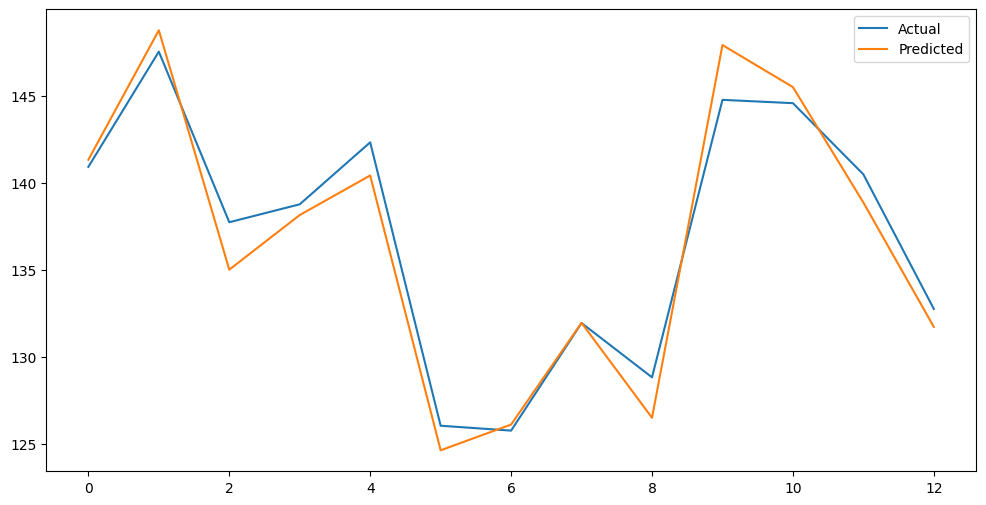

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_test.flatten(), label="Predicted")
plt.legend()
plt.show()
